#Binary Logistic Regression

In [ ]:
from IPython.display import Latex, Math, display

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
np.random.seed(1111)

#Model
##It has 2 steps --
1. Linear Combination of Features
2. Sigmoid Activation Function 

In [ ]:
def linear_combination_of_features(X:np.ndarray,w:np.ndarray):
    return X @ w

In [ ]:
def sigmoid(z:np.ndarray) -> np.ndarray:
    return 1/(1 + np.exp(-z))
    

In [ ]:
def predict(X:np.ndarray,w:np.ndarray,threshold:float) -> np.ndarray:
    return np.where(sigmoid(linear_combination_of_features(X,w))> threshold,1,0)

In [ ]:
feature_matrix = np.array([[1,20,2],[1,2,2]])
weight_vector = np.array([-1,0,1])

print("Shape of feature matrix:", feature_matrix.shape)
print("Shape of weight vector:", weight_vector.shape)

class_labels = predict(feature_matrix, weight_vector, 0.5)

print("Shape of class labels:" , class_labels.shape)
print("Output:",class_labels)

Shape of feature matrix: (2, 3)
Shape of weight vector: (3,)
Shape of class labels: (2,)
Output: [1 1]


#Loss Function
##Binary Crossentropy without regularization
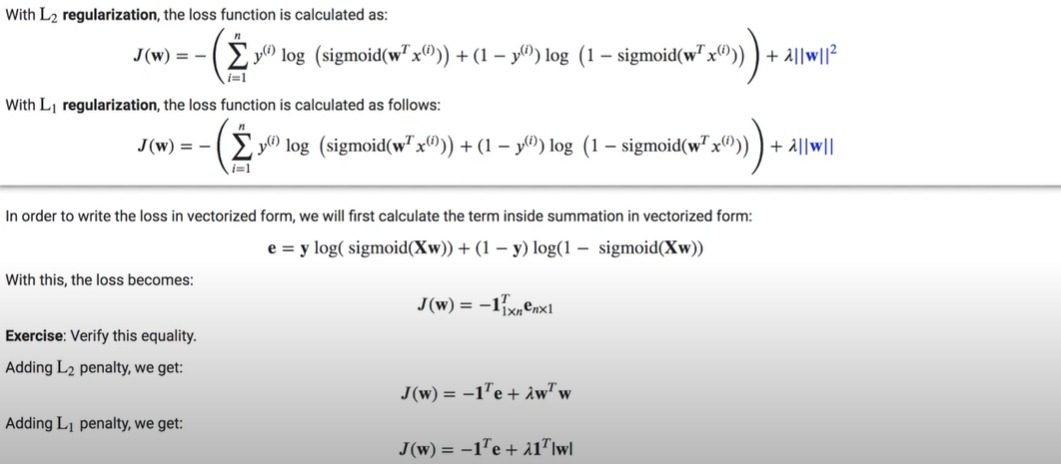

In [ ]:
def loss(y,sigmoid_vector,weight_vector,l1_reg_rate,l2_reg_rate):
    return (-1*(np.sum(y*np.log(sigmoid_vector) + (1-y)*np.log(1 - sigmoid_vector))) 
    + l2_reg_rate*np.dot(np.transpose(weight_vector),weight_vector) 
    + l1_reg_rate*np.sum(np.abs(weight_vector)))

#Optimization
Optimization is done using iterative optimization techniques like Gradient Descent, Minibatch Gradient Descent and Stochastic Gradient Descent.
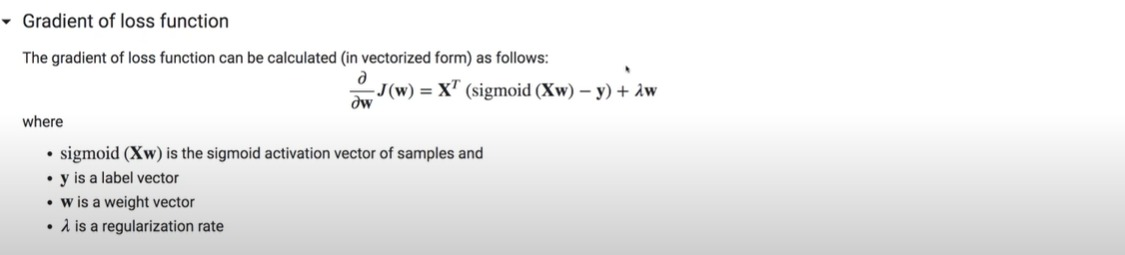

In [ ]:
def calculate_gradient(X:np.ndarray,y:np.ndarray,w:np.ndarray,reg_rate:float) -> np.ndarray:
    return (np.transpose(X) @ (np.sign(X@w) - y) + reg_rate*w)

In [ ]:
class LogisticRegression(object):
    def set_weight_vector(self,w):
        self.w = w 
    
    def linear_combination_of_features(self , X:np.ndarray):
        return X @ self.w 
    
    def sigmoid(self, z:np.ndarray):
        return 1/(1 + np.exp(-z))

    def activation(self,X:np.ndarray):
        return self.sigmoid(self.linear_combination_of_features(X))
    
    def predict(self,X:np.ndarray,threshold:float = 0.5):
        return (self.activation(X) > threshold).astype(int)

    def loss(self,X:np.ndarray,y:np.ndarray,reg_rate:float):
        predicted_prob = self.activation(X)
        return (-1 * np.sum(y*np.log(predicted_prob) + (1-y)*np.log(1-predicted_prob)) 
                + reg_rate*np.dot(np.transpose(self.w),self.w))
        
    def calculate_gradient(self,X:np.ndarray,y:np.ndarray,reg_rate:float):
        return (np.transpose(X)@(self.activation(X)-y) + reg_rate*self.w)
    
    def update_weights(self,grad,lr):
        return self.w - lr*grad

    def gd(self,X:np.ndarray,y:np.ndarray,num_epochs:int,lr:float,reg_rate:float):
        self.w = np.zeros(X.shape[1])
        self.w_all = []
        self.error_list = []
        for i in np.arange(0,num_epochs):
            dJdW = self.calculate_gradient(X,y,reg_rate)
            self.w_all.append(self.w)
            self.error_list.append(self.loss(X,y,reg_rate))
            self.w = self.update_weights(dJdW,lr)
        return self.w



#Logistic Regression for linearly seperable binary classification task

In [ ]:
def create_toy_data():
    x0 = np.random.normal(size=50).reshape(-1,2) + 1
    x1 = np.random.normal(size=50).reshape(-1,2) - 1

    return np.concatenate([x0,x1]),np.concatenate([np.zeros(x1.shape[0]),np.ones(x1.shape[0])]).astype(int)

In [ ]:
feature_matrix, label_vector = create_toy_data()

print("Shape of feature matrix:", feature_matrix.shape)
print("Shape of label vector:", label_vector.shape)

Shape of feature matrix: (50, 2)
Shape of label vector: (50,)


In [ ]:
import itertools
import functools

def polynomial_transform(x, degree):
    if x.ndim == 1:
        x = x[:, None]
    x_t = x.transpose()
    features = [np.ones(len(x))]

    for degree in range(1, degree+1):
        for items in itertools.combinations_with_replacement(x_t, degree):
            features.append(functools.reduce(lambda x, y: x*y, items))
    return np.asarray(features).transpose()

In [ ]:
feature_matrix_bias = polynomial_transform(feature_matrix,degree=1)

In [ ]:
print(feature_matrix_bias)

[[ 1.         -0.97936871  0.63462229]
 [ 1.          1.77143936  0.57961671]
 [ 1.          1.79933192  1.36030094]
 [ 1.          1.11688216  0.7548145 ]
 [ 1.          1.03757971  1.98352281]
 [ 1.          1.19810509  2.17992641]
 [ 1.          0.56286699  2.46757472]
 [ 1.          0.29848634  3.00226532]
 [ 1.         -0.48923568 -0.00779962]
 [ 1.          1.4829113  -0.52291269]
 [ 1.          1.25267441  1.23291655]
 [ 1.          0.99974573  1.23153234]
 [ 1.         -0.5496738   1.06476373]
 [ 1.          2.76843176  1.0954059 ]
 [ 1.          0.86169596  0.12353884]
 [ 1.          1.27489853  2.79337899]
 [ 1.          2.02679134  1.17273279]
 [ 1.          2.03439241  2.97071554]
 [ 1.         -0.28072449  2.01884743]
 [ 1.          0.26587807  0.63075573]
 [ 1.         -0.04129569 -0.4090336 ]
 [ 1.          1.4748607   1.04357226]
 [ 1.          0.4266273   0.57414495]
 [ 1.          0.62263948  0.2318902 ]
 [ 1.          2.17578051 -0.2509364 ]
 [ 1.          1.3268259 

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(feature_matrix_bias,label_vector)

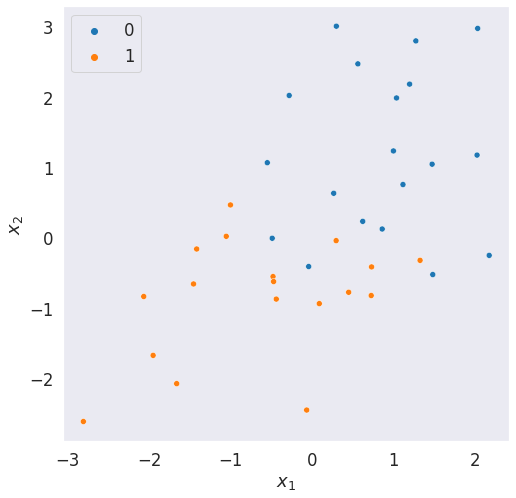

In [ ]:
sns.set_style("dark")
f = plt.figure(figsize = (8,8))
sns.set_context("notebook",font_scale=1.5,rc = {"lines.linewidth":2.5})

sns.scatterplot(data = X_train, x = X_train[:,-2], y = X_train[:,-1],hue = y_train)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [ ]:
log_reg = LogisticRegression()

In [ ]:
log_reg.gd(X_train,y_train,lr=0.001,num_epochs=1000,reg_rate=0)

array([ 0.25814767, -1.25865909, -2.34000417])

In [ ]:
def plot_learning_curve(err):
    plt.plot(np.arange(len(err)),err,"r-")
    plt.xlabel("Iter")
    plt.ylabel("Loss")


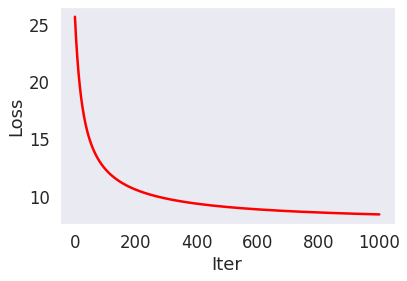

In [ ]:
plot_learning_curve(log_reg.error_list)

In [ ]:
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth': 2.5})

def visualize_model(X_train, labels, log_reg, degree=1):
    f = plt.figure(figsize=(8, 8))

    x1_min = np.min(X_train[:, 1])
    x1_max = np.max(X_train[:, 1])
    x2_min = np.min(X_train[:, 2])
    x2_max = np.max(X_train[:, 2])

    x1_test, x2_test = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                                    np.linspace(x2_min, x2_max, 100))
    x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

    x_test_poly = polynomial_transform(x_test, degree=degree)
    y_test = log_reg.predict(x_test_poly)

    sns.scatterplot(data=X_train, x=X_train[:, 1], y=X_train[:, 2], hue=labels)

    plt.contourf(x1_test, x2_test, y_test.reshape(100, 100), alpha=0.5,
                levels=np.linspace(0, 1, 3))

    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)

    plt.gca().set_aspect('equal', adjustable='box')
    return plt.show()

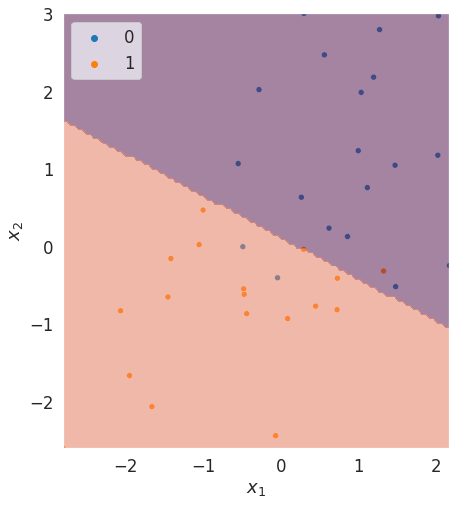

In [ ]:
visualize_model(X_train, y_train, log_reg)

In [ ]:
y_test_hat = log_reg.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_hat))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.88      1.00      0.93         7

    accuracy                           0.92        13
   macro avg       0.94      0.92      0.92        13
weighted avg       0.93      0.92      0.92        13



##Non linearly seperable data

In [ ]:
from sklearn.datasets import make_circles
fm,lv = make_circles()

In [ ]:
x_poly = polynomial_transform(fm,degree=2)

In [ ]:
fm[:5]

array([[-0.77486653,  0.19895191],
       [-0.6472136 ,  0.4702282 ],
       [ 0.6472136 , -0.4702282 ],
       [-0.63742399,  0.77051324],
       [ 0.14990505, -0.7858298 ]])

In [ ]:
x_poly[:5]

array([[ 1.        , -0.77486653,  0.19895191,  0.60041814, -0.15416118,
         0.03958186],
       [ 1.        , -0.6472136 ,  0.4702282 ,  0.41888544, -0.30433809,
         0.22111456],
       [ 1.        ,  0.6472136 , -0.4702282 ,  0.41888544, -0.30433809,
         0.22111456],
       [ 1.        , -0.63742399,  0.77051324,  0.40630934, -0.49114363,
         0.59369066],
       [ 1.        ,  0.14990505, -0.7858298 ,  0.02247152, -0.11779986,
         0.61752848]])

In [ ]:
x_tr,x_te,y_tr,y_te = train_test_split(x_poly,lv)

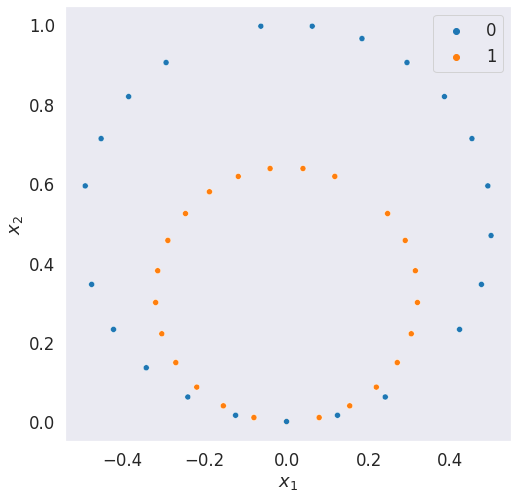

In [ ]:
sns.set_style("dark")
f = plt.figure(figsize = (8,8))
sns.set_context("notebook",font_scale=1.5,rc = {"lines.linewidth":2.5})

sns.scatterplot(data = x_tr, x = x_tr[:,-2], y = x_tr[:,-1],hue = y_tr)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [ ]:
log_reg_poly = LogisticRegression()
log_reg_poly.gd(x_tr,y_tr,lr=0.001,num_epochs=1000,reg_rate=0)

array([ 1.79008468, -0.11428114,  0.06085775, -2.27169429, -0.05198394,
       -2.2842768 ])

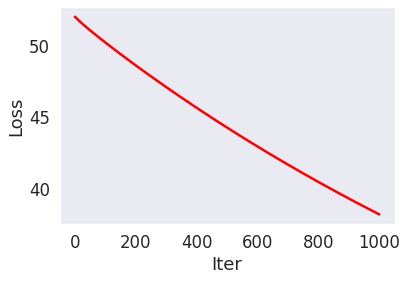

In [ ]:
plot_learning_curve(log_reg_poly.error_list)

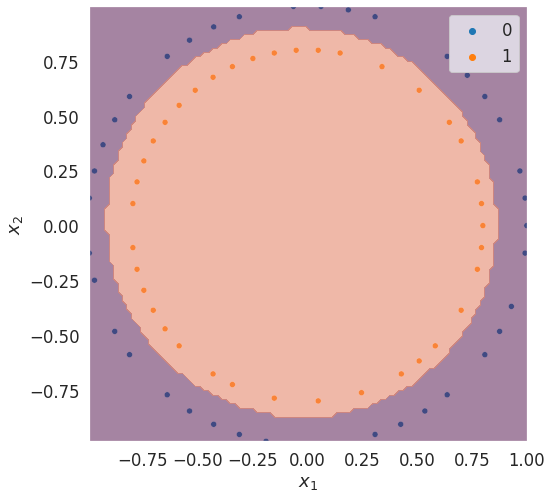

In [ ]:
visualize_model(x_tr, y_tr, log_reg_poly,degree=2)

In [ ]:
y_te_hat = log_reg_poly.predict(x_te)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_te,y_te_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        12

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

